# Obtaining, Cleaning and Integrating Data


<div style='float: center'>
  <img style='display: inline; width: 5%' src="images/csv.png"></img>
  <img style='display: inline; width: 5%' src="images/excel.png"></img>
  <img style='display: inline; width: 4%' src="images/dbms.png"></img>
  <img style='display: inline; width: 5%' src="images/twitter.png"></img>
  <img style='display: inline; width: 5%' src="images/www.png"></img>
</div>

<font color='blue'> keywords:<font color='black'>  
    
**obtaining data:** csv, tsv, excel, database, Twitter API, Web scraping  

**cleaning data:** handling missing values, outlier detection, deplucates

So far we have been working with dataset provided in R packages, which is a great way to learn how to use R for basic data analysis tasks, e.g., data transformation, correlation analysis, and visualization. In practice, we need to collect and work with our own data from different sources to perform analysis. In this lab session, we will learn how to read data from csv, tsv or other delimited flat files, excel files, databases, social media such Twitter and the Web. We will also learn how to handle missing values, perform discretization, outlier detection and handle duplicates.

# Reading Flat Files

In this part we will learn how to load flat files, i.e, plain-text rectangular files, e.g., csv files in to R. We will use the [readr](http://readr.tidyverse.org/) package, which is part of the core [tidyverse](https://www.tidyverse.org/). This package contains functions that read flat files into data frames:

    read_csv() reads comma delimited files
    read_tsv() reads tab separated files
    read_delim() reads in files with any delimiter
    read_log() reads Apache style log files

In [3]:
# First, we need the tidyverse packages
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Reading local files

In [ ]:
# Example: to read in the Titanic dataset from 'titanic.csv' file 
# in the provided 'data' folder
titanic <- read_csv(file='data/titanic.csv', skip = 5)
head(titanic)

In [ ]:
# Questions: what are `file` and `skip` options in the 'read_csv' function?
# What are the other options?

# Answers are provided in the function documentation
?read_csv

## Reading remote files using URLs

Example: the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.html) maintains close to 400 datasets that are of interest to the machine learning community. Another good place to look for datasets is [Kaggle datasets](https://www.kaggle.com/datasets). For this example, we will read in the [Automobile]  (http://archive.ics.uci.edu/ml/datasets/Automobile) dataset using its URL

In [ ]:
url <- 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
automobile <- read_csv(file=url)

**Practice**: Reading [Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris)

In [17]:
# YOUR CODE GOES HERE
url <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data'
iris <- read_csv(file=url,col_names = FALSE)
head(iris)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_character()
)


X1,X2,X3,X4,X5
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa


# Reading Excel Files

In this part we will see how to use the [readxl](http://readxl.tidyverse.org/) package which is also part of the [tidyverse](https://www.tidyverse.org/) that loads excel files in both `.xls` and `.xlsx` formats into R.

    read_excel() reads both .xls and .xlsx files
    excel_sheets() lists sheet names in an excel file
    readxl_examples() includes several example excel files

In [4]:
# load readxl package
library(readxl)

In [ ]:
# example: read 'SalesOrders' from the 'SampleData.xlsx' file 
# in the provided 'data' folder
orders <- read_excel(path='data/SampleData.xlsx',sheet='SalesOrders')
head(orders)

In [ ]:
# Questions: what are `path` and `sheet` options in the 'read_excel' function?
# What are the other options?

# Answers are provided in the function documentation
?read_excel

**Practice**: read 'Sales' from the 'FinancialSample.xlsx' file in the provided 'data' folder

In [18]:
# YOUR CODE GOES HERE
sales <- read_excel(path='data/FinancialSample.xlsx',sheet='Sales')
head(sales)

Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
Government,Canada,Carretera,None,1618.5,3,20,32370,0,32370,16185,16185,2014-01-01,1,January,2014
Government,Germany,Carretera,None,1321.0,3,20,26420,0,26420,13210,13210,2014-01-01,1,January,2014
Midmarket,France,Carretera,None,2178.0,3,15,32670,0,32670,21780,10890,2014-06-01,6,June,2014
Midmarket,Germany,Carretera,None,888.0,3,15,13320,0,13320,8880,4440,2014-06-01,6,June,2014
Midmarket,Mexico,Carretera,None,2470.0,3,15,37050,0,37050,24700,12350,2014-06-01,6,June,2014
Government,Germany,Carretera,None,1513.0,3,350,529550,0,529550,393380,136170,2014-12-01,12,December,2014


# Reading Data from Databases

Tutorials:
- [A quick look](https://db.rstudio.com/getting-started/database-queries/)
- [More detail](https://nceas.github.io/oss-lessons/sql-database-access-in-r/sql-database-access-in-r.html)

## Use R package that wraps an API

Example: use ['twitteR'](https://www.rdocumentation.org/packages/twitteR) package to crawl data from Twitter using its [APIs](https://developer.twitter.com/en/docs/basics/getting-started).

We first need to register for a [Twitter developer account](https://developer.twitter.com/en/apply-for-access.html), and then create some apps to obtain credentials for using the APIs

In [149]:
# install (if not yet) and load twitteR package
# install.packages("twitteR")
library(twitteR)


Attaching package: ‘twitteR’

The following objects are masked from ‘package:dplyr’:

    id, location



In [150]:
# assign keys as provided by Twitter for your app
consumer_key <- "ED8K1p9joMKbcEUhasl7RBrjb"
consumer_secret <- "cCKNpTzG4WwKyaxnEEHRjujfK5KxEYTHGQ2kQKQnJyU2IkDtsG"
access_token <- "2549506364-wSiDhgHwIEHT59kXwlxdKBq8b95ocOJpeD4ulL9"
access_secret <- "80nIxiEt392AN76kHGEQfCaBSOfZ76J2xEOWqoAxOn3J7"

In [151]:
# establish the connection to Twitter
setup_twitter_oauth(consumer_key, consumer_secret, access_token, access_secret)
# search for 50 tweets containing '#realDonaldTrump'
tweets = searchTwitter('#realDonaldTrump', n = 50, since = '2019-11-10', retryOnRateLimit = 1e3)
# convert to data frame
df = twListToDF(tweets)
df

[1] "Using direct authentication"


Registered S3 method overwritten by 'openssl':
  method      from
  print.bytes Rcpp


text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
RT @anderscorr: This man is the spirit of the Nazi SS - alive &amp; well today in #HongKong. Please take stronger action against China's #CCP.…,FALSE,0,NA,2019-11-18 15:08:09,FALSE,NA,1196444992719339520,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",WinniC4,1851,TRUE,FALSE,NA,NA
RT @anderscorr: This man is the spirit of the Nazi SS - alive &amp; well today in #HongKong. Please take stronger action against China's #CCP.…,FALSE,0,NA,2019-11-18 15:07:49,FALSE,NA,1196444906090164226,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",HK_sicked,1851,TRUE,FALSE,NA,NA
RT @anderscorr: This man is the spirit of the Nazi SS - alive &amp; well today in #HongKong. Please take stronger action against China's #CCP.…,FALSE,0,NA,2019-11-18 15:07:44,FALSE,NA,1196444885521293312,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",hxhsu6,1851,TRUE,FALSE,NA,NA
RT @anderscorr: This man is the spirit of the Nazi SS - alive &amp; well today in #HongKong. Please take stronger action against China's #CCP.…,FALSE,0,NA,2019-11-18 15:07:14,FALSE,NA,1196444760346488832,NA,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",Wyoung07226731,1851,TRUE,FALSE,NA,NA
RT @anderscorr: This man is the spirit of the Nazi SS - alive &amp; well today in #HongKong. Please take stronger action against China's #CCP.…,FALSE,0,NA,2019-11-18 15:06:51,FALSE,NA,1196444665148362752,NA,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",GloryTo_HK,1851,TRUE,FALSE,NA,NA
"RT @gkanozo: El guión contra la colaboración médica cubana parece calcado X gobiernos distantes geográficamente, pero peligrosamente cercan…",FALSE,0,NA,2019-11-18 15:06:51,FALSE,NA,1196444662283866117,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Odalys66153117,25,TRUE,FALSE,NA,NA
RT @anderscorr: This man is the spirit of the Nazi SS - alive &amp; well today in #HongKong. Please take stronger action against China's #CCP.…,FALSE,0,NA,2019-11-18 15:06:43,FALSE,NA,1196444631996649473,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",doris11477190,1851,TRUE,FALSE,NA,NA
RT @IronSharpensIr4: ⚔️💪🏼🎤🇨🇦💪🏼🇺🇸⚔️ this man may single Handley with a couple others take down the American pop music industry and expose i…,FALSE,0,NA,2019-11-18 15:06:00,FALSE,NA,1196444448437211136,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",AskeaPhyllis,15,TRUE,FALSE,NA,NA
RT @anderscorr: This man is the spirit of the Nazi SS - alive &amp; well today in #HongKong. Please take stronger action against China's #CCP.…,FALSE,0,NA,2019-11-18 15:04:26,FALSE,NA,1196444058094161926,NA,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",PolicyApple,1851,TRUE,FALSE,NA,NA
@realDonaldTrump Thanksgiving 2019 Request for POTUS Trump #realDonaldTrump Thanksgiving 2019 Request #QANON Thanks… https://t.co/ALP20kgoo9,FALSE,0,realDonaldTrump,2019-11-18 15:04:25,TRUE,NA,1196444051383476226,25073877,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",qrz_jesus,0,FALSE,FALSE,NA,NA


In [156]:
# Practice: retrieves last 20 tweets by 'CNN Breaking News' (cnnbrk)

# Hint: use 'userTimeline' function
tweets = userTimeline('cnnbrk', n = 20)
# convert to data frame
df = twListToDF(tweets)
df

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
T-Mobile announces that CEO John Legere will be stepping down at the end of next April after his contract expires… https://t.co/KLbdyMRmvS,FALSE,149,NA,2019-11-18 14:09:11,TRUE,NA,1196430153901105154,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",cnnbrk,59,FALSE,FALSE,NA,NA
"Iowans on both sides of the political spectrum see the inquiry as a boost to their party's chances in 2020, a new C… https://t.co/u7EbxdA4m4",FALSE,115,NA,2019-11-18 11:05:35,TRUE,NA,1196383948022173696,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",cnnbrk,31,FALSE,FALSE,NA,NA
"One person was killed and several were injured after a bridge collapsed in southwest France, according to the Haut-… https://t.co/sJKlQQW3UV",FALSE,188,NA,2019-11-18 10:45:42,TRUE,NA,1196378945140203521,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",cnnbrk,80,FALSE,FALSE,NA,NA
"At least 10 people were shot, four of them were killed, at a football watch party in Fresno, California, police say https://t.co/xLgeNuBtdp",FALSE,626,NA,2019-11-18 06:15:29,FALSE,NA,1196310943422128128,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",cnnbrk,499,FALSE,FALSE,NA,NA
"Protesters set fire to the entrance of a Hong Kong university to stop riot police from entering the campus, as a si… https://t.co/hk4cdfqIVT",FALSE,926,NA,2019-11-18 00:24:33,TRUE,NA,1196222624814305280,NA,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",cnnbrk,538,FALSE,FALSE,NA,NA
"Kimba, a 12-year-old giraffe at the Cincinnati Zoo, died Sunday after complications from a procedure to fix its hoo… https://t.co/qXVVgjT9fP",FALSE,520,NA,2019-11-17 22:28:00,TRUE,NA,1196193294507753473,NA,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",cnnbrk,141,FALSE,FALSE,NA,NA
Social activities of Syracuse University's fraternities have been suspended for the rest of the semester after the… https://t.co/UnLalLfQZa,FALSE,450,NA,2019-11-17 18:42:35,TRUE,NA,1196136566214856704,NA,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",cnnbrk,168,FALSE,FALSE,NA,NA
"A semi truck overturned on a Virginia highway and a charter bus slammed into it, splitting the trailer in half and… https://t.co/jUsmn1wRBz",FALSE,441,NA,2019-11-17 17:50:59,TRUE,NA,1196123581845065729,NA,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",cnnbrk,164,FALSE,FALSE,NA,NA
Sri Lanka's former defense secretary Gotabaya Rajapaksa has been elected president in the country's first election… https://t.co/W7IXT94T3i,FALSE,275,NA,2019-11-17 15:01:41,TRUE,NA,1196080976612544512,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",cnnbrk,66,FALSE,FALSE,NA,NA
Saudi Arabia puts a $1.7 trillion price tag on its oil monopoly as it prepares for the Saudi Aramco share sale… https://t.co/m4lB47hRJn,FALSE,332,NA,2019-11-17 12:06:12,TRUE,NA,1196036814844375040,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",cnnbrk,120,FALSE,FALSE,NA,NA


In [184]:
# Practice: retrieves trends in Berlin

# Hint use 'getTrends' function

# YOUR CODE GOES HERE
woeid <- closestTrendLocations(52.525096, 13.400895)['woeid']
df <- getTrends(woeid)
head(df)


name,url,query,woeid.woeid
#rp20,http://twitter.com/search?q=%23rp20,%23rp20,638242
#Digitalklausur,http://twitter.com/search?q=%23Digitalklausur,%23Digitalklausur,638242
#MondayMotivation,http://twitter.com/search?q=%23MondayMotivation,%23MondayMotivation,638242
#AnneWill,http://twitter.com/search?q=%23AnneWill,%23AnneWill,638242
#bdk19,http://twitter.com/search?q=%23bdk19,%23bdk19,638242
Alkohol,http://twitter.com/search?q=Alkohol,Alkohol,638242


## Scraping data without an API

Often, web-data is not provided in consistently well formated form but in various forms that are represented in HTML pages. For such case, we can use 'rvest' package to extract information from the pages.

Basic Workflow
1. Download the HTML and turn it into XML file with `read_html()`
2. Extract specific nodes with `html_nodes()`
3. Extract content from nodes with `html_text()` `html_name()` `html_attrs()` `html_children()` `html_table()`

**Example** To extract top Germany cities by population density from the Wikipedia page on [List of cities in Germany by population](https://en.wikipedia.org/wiki/List_of_cities_in_Germany_by_population), 

In [105]:
# load rvest package
library(rvest)

Loading required package: xml2

Attaching package: ‘rvest’

The following object is masked from ‘package:purrr’:

    pluck

The following object is masked from ‘package:readr’:

    guess_encoding



In [164]:
url <- 'https://en.wikipedia.org/wiki/List_of_cities_in_Germany_by_population'
tbl <- url %>%
    read_html() %>%
    html_node(xpath='//*[@id="mw-content-text"]/div/table[1]')
html_table(tbl)
tbl

2015rank,City,State,2015Estimate,2011Census,Change,2015land area,2015populationdensity,Location
1,Berlin,Berlin,"3,520,031","3,292,365",+6.91%,891.68 km2344.28 sq mi,"3,948/km210,230/sq mi",52°31′N 13°23′E﻿ / ﻿52.517°N 13.383°E﻿ / 52.517; 13.383﻿ (1 Berlin)
2,Hamburg,Hamburg,"1,787,408","1,706,696",+4.73%,755.3 km2291.6 sq mi,"2,366/km26,130/sq mi",53°33′N 10°0′E﻿ / ﻿53.550°N 10.000°E﻿ / 53.550; 10.000﻿ (2 Hamburg)
3,Munich (München),Bavaria,"1,450,381","1,348,335",+7.57%,310.7 km2120.0 sq mi,"4,668/km212,090/sq mi",48°8′N 11°34′E﻿ / ﻿48.133°N 11.567°E﻿ / 48.133; 11.567﻿ (3 Munich)
4,Cologne (Köln),North Rhine-Westphalia,"1,060,582","1,005,775",+5.45%,405.02 km2156.38 sq mi,"2,619/km26,780/sq mi",50°56′N 6°57′E﻿ / ﻿50.933°N 6.950°E﻿ / 50.933; 6.950﻿ (4 Cologne)
5,Frankfurt am Main,Hesse,"732,688","667,925",+9.70%,248.31 km295.87 sq mi,"2,951/km27,640/sq mi",50°7′N 8°41′E﻿ / ﻿50.117°N 8.683°E﻿ / 50.117; 8.683﻿ (5 Frankfurt)
6,Stuttgart,Baden-Württemberg,"623,738","585,890",+6.46%,207.35 km280.06 sq mi,"3,008/km27,790/sq mi",48°47′N 9°11′E﻿ / ﻿48.783°N 9.183°E﻿ / 48.783; 9.183﻿ (6 Stuttgart)
7,Düsseldorf,North Rhine-Westphalia,"612,178","586,291",+4.42%,217.41 km283.94 sq mi,"2,816/km27,290/sq mi",51°14′N 6°47′E﻿ / ﻿51.233°N 6.783°E﻿ / 51.233; 6.783﻿ (7 Düsseldorf)
8,Dortmund,North Rhine-Westphalia,"586,181","571,143",+2.63%,280.71 km2108.38 sq mi,"2,088/km25,410/sq mi",51°31′N 7°28′E﻿ / ﻿51.517°N 7.467°E﻿ / 51.517; 7.467﻿ (8 Dortmund)
9,Essen,North Rhine-Westphalia,"582,624","566,201",+2.90%,210.34 km281.21 sq mi,"2,770/km27,200/sq mi",51°27′N 7°1′E﻿ / ﻿51.450°N 7.017°E﻿ / 51.450; 7.017﻿ (9 Essen)
10,Leipzig,Saxony,"560,472","502,979",+11.43%,297.8 km2115.0 sq mi,"1,882/km24,870/sq mi",51°20′N 12°23′E﻿ / ﻿51.333°N 12.383°E﻿ / 51.333; 12.383﻿ (10 Leipzig)


{xml_node}
<table class="wikitable sortable" style="font-size: 95%; text-align:center">
[1] <tbody>\n<tr>\n<th>2015<br>rank\n</th>\n<th>City\n</th>\n<th>\n<a href="/ ...

# Handling Missing Values

We want to handle missing values in the `titanic` dataset we read earlier. In particular, we want to find the variables with missing values such as 'Embarked', 'Fare', and 'Age' and handle these variables.

In [165]:
# read the dataset again, if needed
titanic <- read_csv(file='data/titanic.csv', skip = 5)
# convert 'Embarked' to factors
table(parse_factor(titanic$Embarked, levels=c('C', 'S', 'Q')))

Parsed with column specification:
cols(
  PassengerId = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character(),
  Survived = col_double()
)



   C    S    Q <NA> 
 270  914  123    2 

## Dealing with missing 'Embarked'

In [32]:
# Find the passengers with missing values for 'Embarked'
titanic %>% filter(is.na(Embarked))

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
62,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,NA,1
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,NA,1


In [28]:
# The most simple way for dealing with missing value is just ignoring them
embark_fare <- titanic %>%
    filter(!is.na(Embarked))

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”

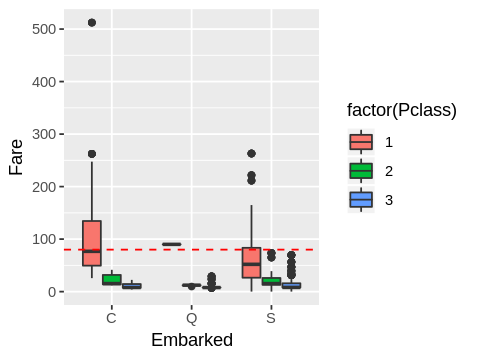

In [30]:
# Other way is to use 'sensible value imputation' 
# that is, make use of the distribution of data with e.g., mean, median or mode. 

# Here, it makes sense to infer 'Embarked' based on 'fare' as same class passengers 
# that paid similar fare shoule embarked from the same location


# We first examine the distribution of fare w.r.t different classes and embarking location
# set plot dimentions
options(repr.plot.width=4, repr.plot.height=3)

# Use ggplot2 to visualize embarkment, passenger class, & median fare
ggplot(embark_fare, aes(x=Embarked, y=Fare, fill=factor(Pclass))) +
    geom_boxplot() +
    geom_hline(aes(yintercept=80),  colour='red', linetype='dashed')

In [ ]:
# Note that the median fare for a first class passenger departing from Charbourg (‘C’) 
# coincides nicely with the $80 paid by our embarkment-deficient passengers. 
# This seams like a reasonable value to replace the NA values.
titanic$Embarked[c(62, 830)] <- 'C'

## Dealing with missing 'Fare'

In [34]:
# Find passengers with missing value for ' 'Fare'
titanic %>% filter(is.na(Fare))

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NA,NA,S,NA


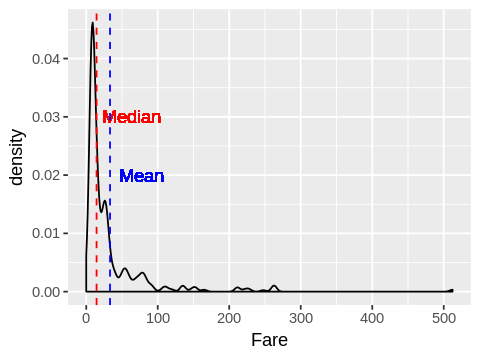

In [36]:
# A simple way for dealing with missing numerical value is to replace them with the
# statistics e.g., mean or mode

# Let us look at the distribution of Fare
fare <- titanic %>% filter(!is.na(Fare))

ggplot(fare, aes(Fare)) +
    geom_density() +
    geom_vline(aes(xintercept=median(Fare)), 
               color='red',
               linetype='dashed') +
    geom_text(x=median(fare$Fare), 
              y=0.03, 
              label='Median',
              color='red',
              hjust=-.1) +
    geom_vline(aes(xintercept=mean(Fare)), 
               color='blue',
               linetype='dashed') +
    geom_text(x=median(fare$Fare), 
              y=0.02, 
              label='Mean',
              color='blue',
              hjust=-.5)

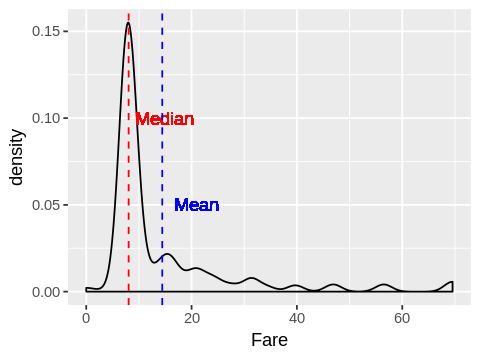

In [39]:
fare <- titanic %>% filter(!is.na(Fare), Pclass == '3', Embarked == 'S')

ggplot(fare, aes(Fare)) +
    geom_density() +
    geom_vline(aes(xintercept=median(Fare)), 
               color='red',
               linetype='dashed') +
    geom_text(x=median(fare$Fare), 
              y=0.1, 
              label='Median',
              color='red',
              hjust=-.1) +
    geom_vline(aes(xintercept=mean(Fare)), 
               color='blue',
               linetype='dashed') +
    geom_text(x=median(fare$Fare), 
              y=0.05, 
              label='Mean',
              color='blue',
              hjust=-1)

In [ ]:
# Replace missing fare value with median fare for same class/embarkment
titanic$Fare[1044] <- median(titanic[titanic$Pclass == '3' & titanic$Embarked == 'S', ]$Fare, na.rm = TRUE)

## Dealing with missing value in 'Age'

In [40]:
# Number of missing Age values
titanic %>% filter(is.na(Age)) %>% head()
sum(is.na(titanic$Age))

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
6,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q,0
18,2,"Williams, Mr. Charles Eugene",male,NA,0,0,244373,13.0000,NA,S,1
20,3,"Masselmani, Mrs. Fatima",female,NA,0,0,2649,7.2250,NA,C,1
27,3,"Emir, Mr. Farred Chehab",male,NA,0,0,2631,7.2250,NA,C,0
29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NA,0,0,330959,7.8792,NA,Q,1
30,3,"Todoroff, Mr. Lalio",male,NA,0,0,349216,7.8958,NA,S,0


[1] 263

Here, we will **predictive imputation** for inferring the missing 'Age'. That is, we will train a model for predicting 'Age' from other columns.

We will use [mice](https://cran.r-project.org/web/packages/mice/README.html) package for this task.

In [47]:
# install mice package if not yet
# install.packages('mice')

# load the package
library(mice)

In [48]:
# Convert categorical variables into factors
factor_vars <- c('PassengerId','Pclass','Sex','Embarked')

titanic[factor_vars] <- lapply(titanic[factor_vars], function(x) as.factor(x))

# Train a model for predicting:
mice_mod <- mice(titanic[, !names(titanic) %in% c('PassengerId','Name','Ticket','Cabin','Family','Surname','Survived')], method='rf') 


 iter imp variable
  1   1  Fare  Embarked
  1   2  Fare  Embarked
  1   3  Fare  Embarked
  1   4  Fare  Embarked
  1   5  Fare  Embarked
  2   1  Fare  Embarked
  2   2  Fare  Embarked
  2   3  Fare  Embarked
  2   4  Fare  Embarked
  2   5  Fare  Embarked
  3   1  Fare  Embarked
  3   2  Fare  Embarked
  3   3  Fare  Embarked
  3   4  Fare  Embarked
  3   5  Fare  Embarked
  4   1  Fare  Embarked
  4   2  Fare  Embarked
  4   3  Fare  Embarked
  4   4  Fare  Embarked
  4   5  Fare  Embarked
  5   1  Fare  Embarked
  5   2  Fare  Embarked
  5   3  Fare  Embarked
  5   4  Fare  Embarked
  5   5  Fare  Embarked


In [49]:
# Save the complete output 
mice_output <- complete(mice_mod)

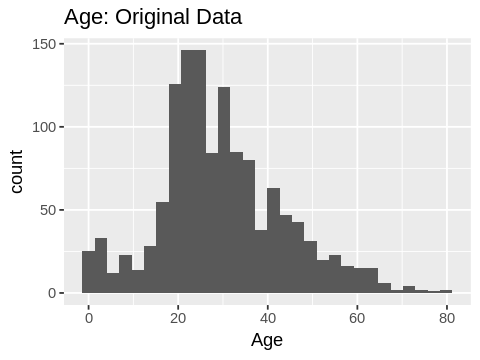

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.17   21.00   28.00   29.52   38.00   80.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.17   21.00   28.00   29.52   38.00   80.00 

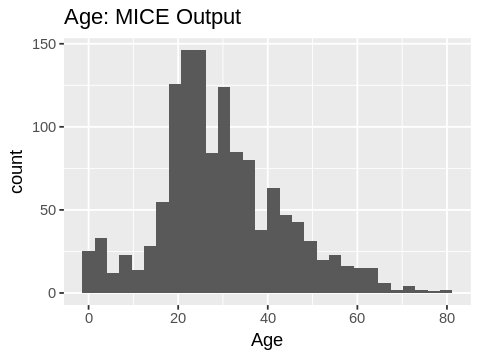

In [52]:
# Examine the goodness of the imputation by the mice_model by looking into the distributions
# of the original data and the imputated data

# Plot age distributions
ggplot(titanic, aes(x=Age)) +
    geom_histogram(bins=30, na.rm = TRUE) +
    labs(title = "Age: Original Data")

ggplot(mice_output, aes(x=Age)) +
    geom_histogram(bins=30) +
    labs(title = "Age: MICE Output")

# Statistical summaries
summary(titanic$Age)
summary(mice_output$Age)

In [53]:
# Replace Age variable from the mice model.
titanic$Age <- mice_output$Age

## Handling Duplicates

We sometimes end up with duplicate cases in our datasets and want to retain only one among the duplicates. In this exercise, you will learn to:
    
    remove duplicate rows based on all columns
    remove duplicate rows based on certain columns (variables)
    
using `distinct` from the `dplyr` package.

In [55]:
# Here we use example dataset in the 'datasets.xlsx' file included in 'readxl' package
datasets_path <- readxl_example('datasets.xls')
datasets_path
datasets <- read_excel(datasets_path)
head(datasets)

[1] "/home/tuan-anh/anaconda3/envs/r_env/lib/R/library/readxl/extdata/datasets.xls"

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [56]:
# Remove duplicate rows based on all columns
datasets_uniq_all <- distinct(datasets)

#Check the number of rows before and after removing duplicates, you will find that 1 row has been removed
nrow(datasets)
nrow(datasets_uniq_all)

[1] 150

[1] 149

In [57]:
str(datasets)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : chr  "setosa" "setosa" "setosa" "setosa" ...


In [58]:
# Remove duplicate rows based on certain column(s) 

# Remove duplicated rows based on Sepal.Length
datasets_uniq_slen <- distinct(datasets, Sepal.Length)

# Remove duplicated rows based on Sepal.Length and Petal.Width
datasets_uniq_slen_pwid <- distinct(datasets, Sepal.Length, Petal.Width)

# Check the number of rows before and after removing duplicates
nrow(datasets_uniq_slen)
nrow(datasets_uniq_slen_pwid)

[1] 35

[1] 110

## Outlier Detection

The [outliers](https://cran.r-project.org/web/packages/outliers/outliers.pdf) package is a collection of some tests commonly used for identifying outliers.

In [61]:
# install the "outliers" package if needed
install.packages("outliers", repos="https://cran.uni-muenster.de/")

# load the package
library(outliers)


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [98]:
# Here we use the daily gas price dataset, provided in 'daily_csv.csv' in 'data' folder
gas_price = read_csv('data/daily_csv.csv',col_names = TRUE)
head(gas_price)

Parsed with column specification:
cols(
  Date = col_date(format = ""),
  Price = col_double()
)


Date,Price
1997-01-07,3.82
1997-01-08,3.80
1997-01-09,3.61
1997-01-10,3.92
1997-01-13,4.00
1997-01-14,4.01


[1] 18.48

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.050   2.730   3.610   4.265   5.325  18.480       1 

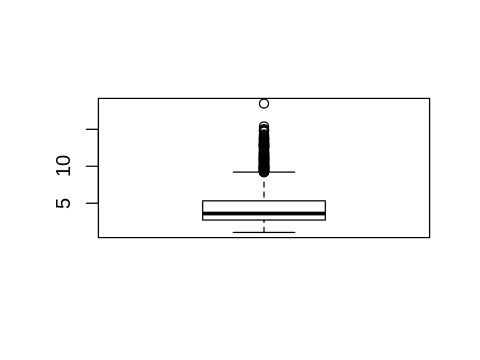

In [99]:
# Find the most outlier value
outlier(gas_price$Price)
# compare it with the data distribution as shown by statistical summary and by box-plot
summary(gas_price$Price)
boxplot(gas_price$Price)

In [101]:
# Another way to find all the outliers in 'price' is to use boxplot.stats
boxplot.stats(gas_price$Price)$out

[1]  9.96  9.28  9.95 10.49 10.48 10.23  9.58  9.22 10.48  9.97  9.71  9.45
 [13] 10.03 10.31  9.95  9.91 11.98 18.48 10.47 10.81  9.29  9.59  9.53  9.66
 [25]  9.99  9.38  9.44  9.96 10.02  9.77  9.86  9.86 12.36 12.69 11.36 11.75
 [37] 11.56 11.03 10.92 11.03 10.68 10.71 10.80 11.24 11.25 11.99 12.76 14.26
 [49] 14.84 13.67 13.29 13.67 13.77 13.48 12.80 13.89 13.41 13.52 13.24 12.73
 [61] 12.95 13.90 14.68 13.90 13.10 12.18 10.80 10.85 10.79  9.67  9.31  9.66
 [73] 11.03 11.92 10.01 10.48 11.15 11.02 11.01 11.17 11.73 12.58 12.95 14.27
 [85] 13.57 13.95 14.25 15.02 14.82 15.39 14.81 14.07 13.36 13.73 13.79 13.56
 [97] 13.03 11.17 10.22  9.90 10.07  9.52  9.90  9.25  9.24  9.30  9.37  9.70
[109]  9.82  9.59  9.85  9.69  9.74  9.84  9.59  9.28  9.25  9.30  9.36  9.86
[121]  9.92  9.60  9.68  9.36  9.48  9.78  9.88 10.18 10.07 10.03 10.16 10.11
[133] 10.27 10.08 10.50 10.56 10.33 10.58 10.72 10.95 10.94 10.81 10.66 10.37
[145] 10.77 11.09 11.08 11.33 11.29 11.38 11.18 11.52 11.41 11.31 11.10 10.94
[157] 11.40 11.57 11.56 11.85 11.60 11.81 11.43 11.80 12.27 12.17 12.49 12.71
[169] 12.71 12.72 12.49 12.51 12.51 12.73 12.87 12.93 13.09 12.76 12.92 12.96
[181] 12.76 12.70 13.10 13.19 13.28 13.31 13.00 12.96 12.47 12.10 11.83 12.15
[193] 11.58 11.79 11.15 11.43 10.54 10.58 10.16  9.88  9.70  9.34  9.26  9.26

In [103]:
# Where are those outliers?

# To find out the index of those outliers
index <- which(gas_price$Price %in% boxplot.stats(gas_price$Price)$out)
# To filter the rows corresponding to the indexes
slice(gas_price,index)

Date,Price
2000-12-11,9.96
2000-12-18,9.28
2000-12-20,9.95
2000-12-21,10.49
2000-12-22,10.48
2000-12-26,10.23
2000-12-27,9.58
2000-12-28,9.22
2000-12-29,10.48
2001-01-02,9.97


# Exercise
To retrive weather records for Germany cities in last year that are provided by [Open Weather Map](https://openweathermap.org), then examine the outliers if there exist.  

Hint: You should use the  OWM's historical [APIs](https://openweathermap.org/history)

## References

[Data import - R for Data Science](http://r4ds.had.co.nz/data-import.html)

[Extracting data from the web APIs and beyond](https://github.com/ropensci/user2016-tutorial/blob/master/slides.pdf)

[R Data Import/Export](https://cran.r-project.org/doc/manuals/r-release/R-data.html)

[Exploring Survival on the Titanic](https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic)